<a href="https://colab.research.google.com/github/ngo-canhh/MoodUp/blob/main/fill_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.shape

(140700, 20)

In [ ]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
# Điều kiện lọc
condition = (
    (df['Working Professional or Student'] == 'Student') &
    (df['Academic Pressure'].notna()) &
    (df['Study Satisfaction'].notna()) &
    (df['CGPA'].notna())
)

# Cập nhật giá trị cho các hàng thỏa mãn điều kiện
df.loc[condition, 'Profession'] = 'Student'
df.loc[condition, 'Work Pressure'] = 0.0
df.loc[condition, 'Job Satisfaction'] = 0.0


df[(df['Working Professional or Student'] == 'Student') & (df['Academic Pressure'].notna()) & (df['Study Satisfaction'].notna()) & (df['CGPA'].notna())]


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,30,Prisha,Female,28.0,Varanasi,Student,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,Female,27.0,Surat,Student,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,140686,Rohan,Male,27.0,Ludhiana,Student,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [ ]:
# Điều kiện lọc
condition = (
    (df['Working Professional or Student'] == 'Working Professional') &
    (df['Work Pressure'].notna()) &
    (df['Job Satisfaction'].notna())
)

# Cập nhật giá trị cho các hàng thỏa mãn điều kiện
df.loc[condition, 'Academic Pressure'] = 0.0
df.loc[condition, 'CGPA'] = -1
df.loc[condition, 'Study Satisfaction'] = 0.0

In [ ]:
# Điều kiện lọc
condition = (
    (df['Profession'].isna()) &
    (df['Degree'] == 'Class 12') &
    (df['Working Professional or Student'] == 'Working Professional')
)

# Cập nhật giá trị cho các hàng thỏa mãn điều kiện
df.loc[condition, 'Profession'] = 'Other'


In [ ]:
df[df.isna().any(axis=1)]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
591,591,Anvi,Female,49.0,Nagpur,Working Professional,NaN,0.0,1.0,-1.0,0.0,1.0,Less than 5 hours,Unhealthy,MA,Yes,11.0,3.0,Yes,1
1316,1316,Shlok,Male,38.0,Ludhiana,Working Professional,NaN,0.0,1.0,-1.0,0.0,5.0,7-8 hours,Unhealthy,MSc,Yes,1.0,4.0,No,0
2216,2216,Rudra,Male,20.0,Patna,Working Professional,NaN,0.0,3.0,-1.0,0.0,4.0,5-6 hours,Unhealthy,MBA,Yes,8.0,4.0,Yes,0
2424,2424,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,0.0,4.0,-1.0,0.0,2.0,More than 8 hours,Moderate,B.Arch,Yes,7.0,5.0,Yes,1
3443,3443,Charvi,Female,26.0,Vasai-Virar,Working Professional,NaN,0.0,1.0,-1.0,0.0,1.0,More than 8 hours,Unhealthy,MCA,No,10.0,3.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138770,138770,Lavanya,Female,54.0,Nagpur,Working Professional,NaN,0.0,3.0,-1.0,0.0,2.0,5-6 hours,Moderate,MCA,Yes,7.0,5.0,Yes,0
139506,139506,Tejas,Male,20.0,Ahmedabad,Working Professional,NaN,0.0,4.0,-1.0,0.0,4.0,Less than 5 hours,Moderate,BHM,Yes,4.0,4.0,No,1
139674,139674,Armaan,Male,20.0,Varanasi,Working Professional,NaN,0.0,1.0,-1.0,0.0,1.0,7-8 hours,Unhealthy,PhD,Yes,9.0,5.0,No,0
140655,140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,0.0,1.0,-1.0,0.0,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0


In [ ]:
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,187
Academic Pressure,29
Work Pressure,31
CGPA,28


# Điền random profession

In [ ]:
import random
random.seed(42)
info_profession = df['Profession'].value_counts()
list_profession = []
for index, value in info_profession.items():
  if index not in ['Student', 'Other']:
    for i in range(value):
      list_profession.append(index)
df['Profession'] = df['Profession'].apply(
    lambda x: x if pd.notnull(x) else random.choice(list_profession)
)
df['Profession'].isnull().sum()

0

# Xoá hết Sleep Duration lỗi

# Tính giá trị cho Sleep duration

In [ ]:
import re
def extract_sleep_hours(value):
    if pd.isna(value):
        return None
    match = re.findall(r'\d+', value)
    if len(match) == 1 and float(match[0]) <= 24:
        return float(match[0])
    elif len(match) == 2 and (float(match[0]) + float(match[1])) / 2 <= 24:
        return (float(match[0]) + float(match[1])) / 2
    else:
        return None

In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].apply(extract_sleep_hours)
df['Sleep Duration'].isna()

,Sleep Duration
0,False
1,False
2,False
3,False
4,False
...,...
140695,False
140696,False
140697,False
140698,False


# Map thói quen ăn uống
#

In [ ]:
def map_dietary_habits(value):
    if value in ['Healthy', 'More Healthy', 'Yes']:
        return 'Healthy'
    elif value in ['Unhealthy', 'No Healthy', 'Less Healthy']:
        return 'Unhealthy'
    elif value in ['Moderate']:
        return 'Moderate'
    else:
        return None

In [ ]:
print(df['Dietary Habits'].value_counts())
df['Dietary Habits'] = df['Dietary Habits'].apply(map_dietary_habits)
print('_______________________________________________________')
print(df['Dietary Habits'].value_counts())


Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64
_______________________________________________________
Dietary Habits
Moderate     49705
Unhealthy    46229
Healthy      44745
Name: count, dtype: int64


In [ ]:
df['Dietary Habits'].isna().sum()

21

In [ ]:
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,29
Work Pressure,31
CGPA,28


#END

In [ ]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Depression', 'id', 'Name'])
y = df['Depression']
X.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
X.shape, y.shape

((140700, 17), (140700,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112560, 17), (28140, 17), (112560,), (28140,))

#Preprocessing train_data

##Get str-number columns

In [ ]:
train_number_columns = X_train.select_dtypes(include=['number']).columns
print(train_number_columns)
print('-----------------------------------------------')
train_str_columns = X_train.select_dtypes(include=['object']).columns
print(train_str_columns)

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Work/Study Hours', 'Financial Stress'],
      dtype='object')
-----------------------------------------------
Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


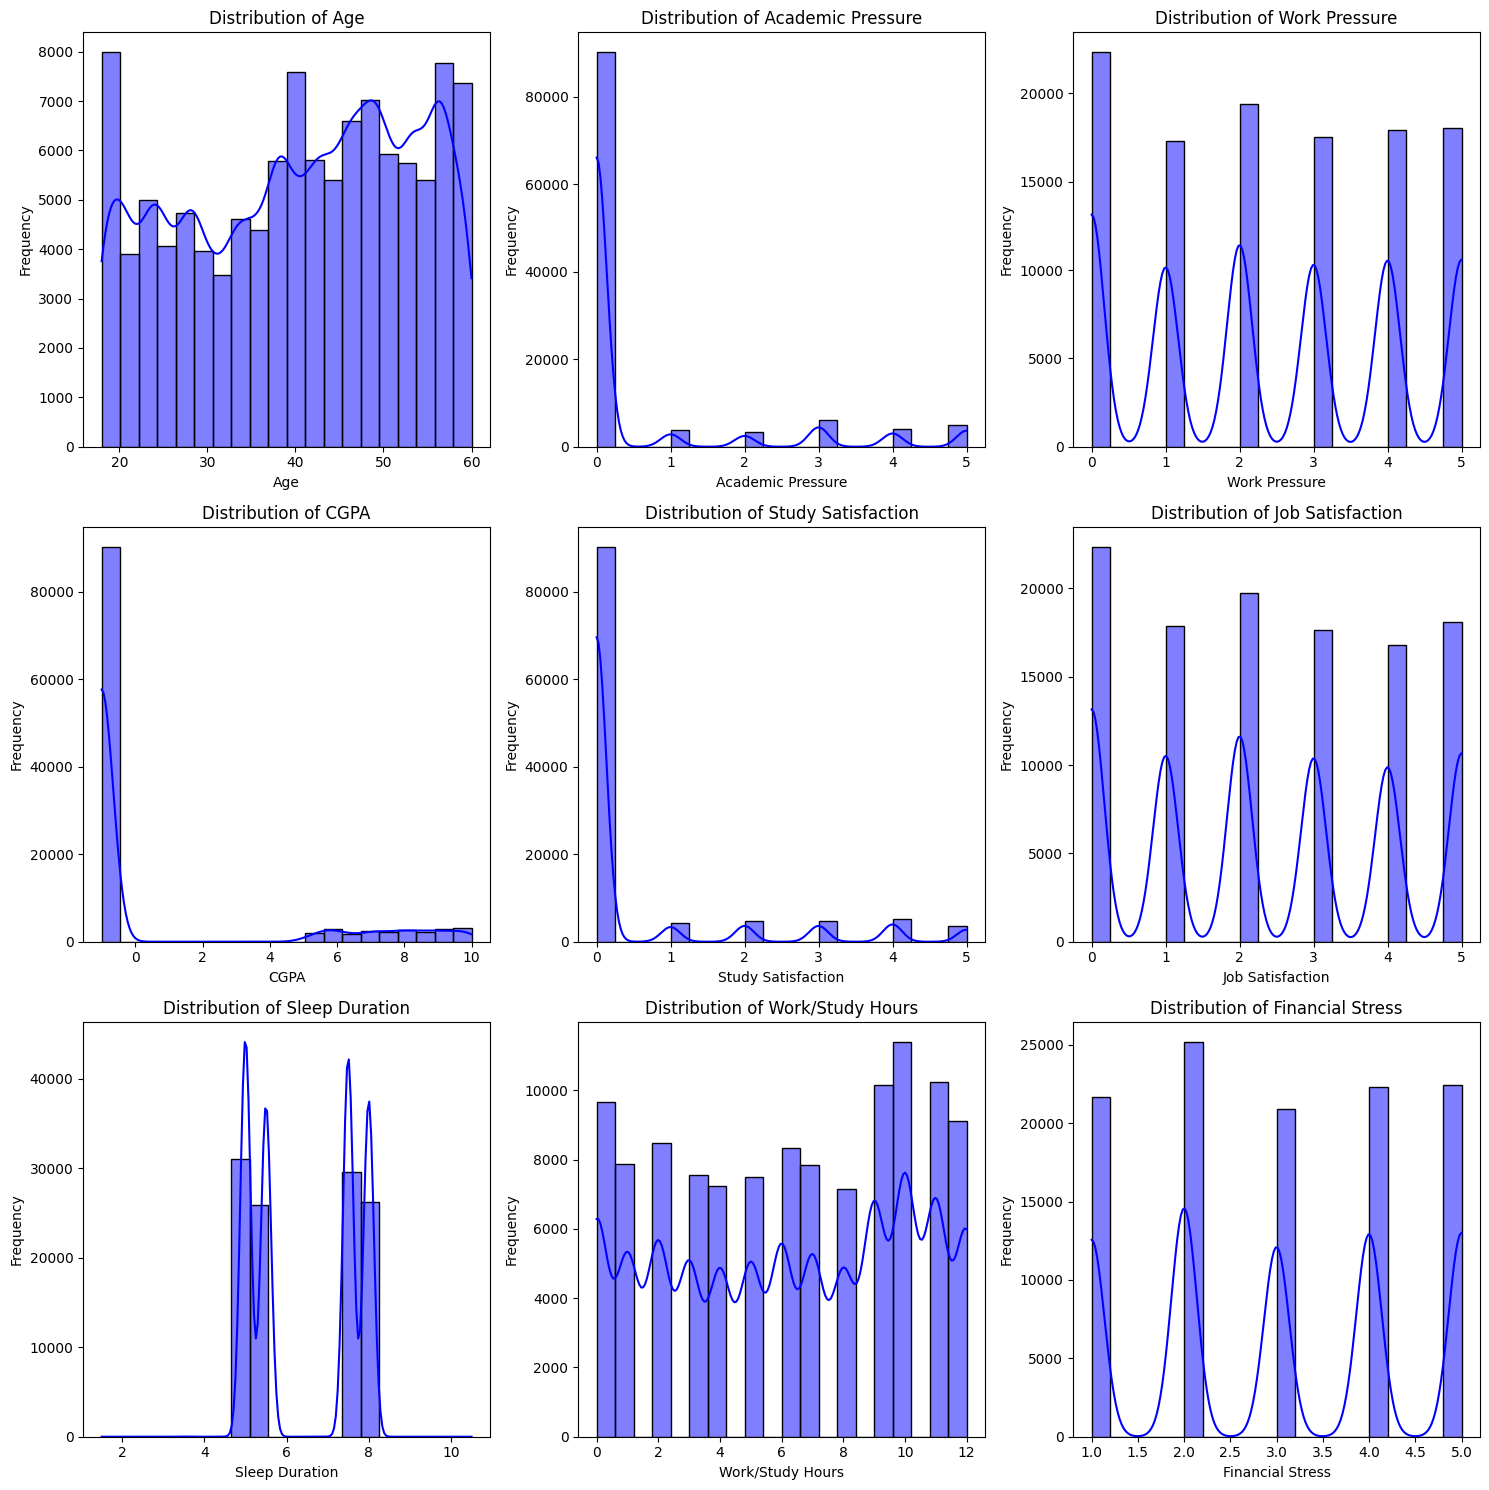

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử X_train đã tồn tại
# Tên các cột số
train_number_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                        'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
                        'Work/Study Hours', 'Financial Stress']

# Thiết lập kích thước hình ảnh
plt.figure(figsize=(15, 15))

# Lặp qua từng cột và vẽ biểu đồ phân phối
for i, col in enumerate(train_number_columns):
    plt.subplot(3, 3, i + 1)  # Chia biểu đồ thành lưới 3x3
    sns.histplot(X_train[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
number_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
str_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessing = ColumnTransformer([
    ('number', number_pipline, train_number_columns),
    ('str', str_pipline, train_str_columns)
])
# fit
# -> transfrom
# = fit_transform
x_train_processed = preprocessing.fit_transform(X_train)
x_test_processed = preprocessing.transform(X_test)


In [ ]:
y_train_processed = y_train.copy()
y_test_processed = y_test.copy()
x_train_processed.shape, y_train_processed.shape


((112560, 17), (112560,))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def focal_loss(inputs, targets, alpha=0.25, gamma=2.0, reduction='mean'):
    probas = F.softmax(inputs, dim=1)

    targets_one_hot = F.one_hot(targets, num_classes=inputs.size(1)).float()
    probas = (probas * targets_one_hot).sum(dim=1)

    log_probas = torch.log(probas + 1e-8)
    focal_weights = (1 - probas) ** gamma

    loss = -alpha * focal_weights * log_probas

    if reduction == 'mean':
        return loss.mean()
    elif reduction == 'sum':
        return loss.sum()
    else:
        return loss

In [ ]:
import pandas as pd
from sklearn import model_selection, preprocessing, svm
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# Load lại dataset
x_train = x_train_processed[0:int(0.75*len(x_train_processed))]
y_train = y_train_processed[0:int(0.75*len(y_train_processed))]
x_val = x_train_processed[int(0.75 * len(x_train_processed)):]
y_val = y_train_processed[int(0.75 * len(y_train_processed)):]
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
X = torch.FloatTensor(x_train)
X_val = torch.FloatTensor(x_val)
Y = torch.LongTensor(y_train.values).flatten()
Y_val = torch.LongTensor(y_val.values).flatten()
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val, Y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

(84420, 17) (84420,) (28140, 17) (28140,)


In [ ]:
# model
net = nn.Sequential(
            nn.Linear(17, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
# Train
num_epochs = 100
best_f1, best_acc = 0, 0
train_loss_list, val_loss_list = [], []
for epoch in range(num_epochs):
    net.train()
    epoch_loss = 0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = nn.funcrional.softmax(net(inputs))
        # print(outputs.shape, labels.shape)
        # loss = criterion(outputs, labels)  # Compute loss
        loss = focal_loss(outputs, labels, alpha=0.25, gamma=2.0, reduction='mean')
        loss.backward()  # Backward
        optimizer.step()  # Update weights
        epoch_loss += loss.item()
    train_loss_list.append(epoch_loss / len(dataloader))

    val_predictions = []
    val_labels = []
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = net(inputs)
            preds = torch.argmax(outputs, dim=1)
            val_predictions.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
    val_prediction = []
    val_label = []
    # Tính F1-score
    for label, pred in zip(val_labels, val_predictions):
        val_prediction.append(pred)
        val_label.append(label)
    val_f1 = f1_score(val_label, val_prediction, average='binary', pos_label=1)
    print(f"Epoch [{epoch+1}/{num_epochs}], F1-score: {val_f1:.4f}")

    # Lưu weights nếu F1 tốt nhất
    if val_f1 > best_f1:
        best_f1 = val_f1
        torch.save(net.state_dict(), 'best_model.pth')
        print(f"Best model saved at Epoch {epoch+1} with F1-score: {best_f1:.4f}")

    # # Tính accuracy
    # for label, pred in zip(val_labels, val_predictions):
    #   val_prediction.append(pred)
    #   val_label.append(label)
    # val_accuracy = accuracy_score(val_label, val_prediction)
    # print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {val_accuracy:.4f}")
    # # Lưu weights nếu accuracy tốt nhất
    # if val_accuracy > best_acc:
    #     best_acc = val_accuracy
    #     torch.save(net.state_dict(), 'best_model.pth')
    #     print(f"Best model saved at Epoch {epoch+1} with Accuracy: {best_acc:.4f}")


    # Validation
    net.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            outputs = net(inputs)
            # loss = criterion(outputs, targets)
            loss = focal_loss(outputs, targets, alpha=0.25, gamma=2.0, reduction='mean')
            val_loss += loss.item()

    val_loss_list.append(val_loss / len(val_dataloader))

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_list[-1]:.4f}, Val Loss: {val_loss_list[-1]:.4f}")

Epoch [1/100], F1-score: 0.8017
Best model saved at Epoch 1 with F1-score: 0.8017
Epoch [1/100], Train Loss: 0.0141, Val Loss: 0.0128
Epoch [2/100], F1-score: 0.7974
Epoch [2/100], Train Loss: 0.0113, Val Loss: 0.0114
Epoch [3/100], F1-score: 0.8195
Best model saved at Epoch 3 with F1-score: 0.8195
Epoch [3/100], Train Loss: 0.0110, Val Loss: 0.0106
Epoch [4/100], F1-score: 0.8185
Epoch [4/100], Train Loss: 0.0108, Val Loss: 0.0108
Epoch [5/100], F1-score: 0.8226
Best model saved at Epoch 5 with F1-score: 0.8226
Epoch [5/100], Train Loss: 0.0108, Val Loss: 0.0105
Epoch [6/100], F1-score: 0.7873
Epoch [6/100], Train Loss: 0.0107, Val Loss: 0.0112
Epoch [7/100], F1-score: 0.8095
Epoch [7/100], Train Loss: 0.0107, Val Loss: 0.0107
Epoch [8/100], F1-score: 0.8138
Epoch [8/100], Train Loss: 0.0107, Val Loss: 0.0106
Epoch [9/100], F1-score: 0.8185
Epoch [9/100], Train Loss: 0.0107, Val Loss: 0.0106
Epoch [10/100], F1-score: 0.8150
Epoch [10/100], Train Loss: 0.0106, Val Loss: 0.0106
Epoch [1

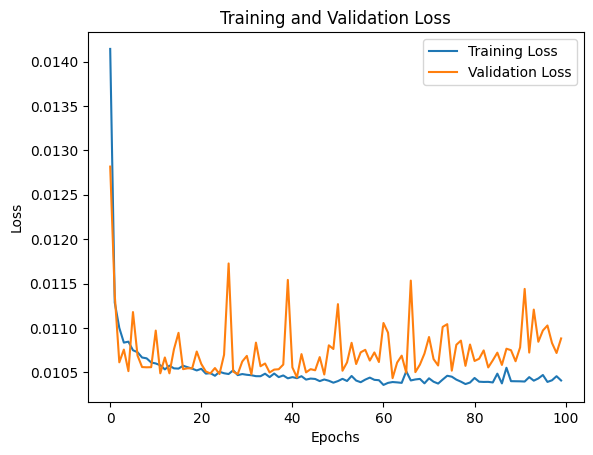

In [ ]:
import matplotlib.pyplot as plt

epochs = range(num_epochs)
plt.plot(epochs, train_loss_list, label='Training Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from torchvision.transforms import ToTensor
net.load_state_dict(torch.load('/content/best_model.pth'))
net.eval()
with torch.no_grad():
    outputs = net(torch.tensor(x_test_processed, dtype=torch.float32))
    predictions = torch.argmax(outputs, dim=1)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22872
           1       0.84      0.82      0.83      5268

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



<ipython-input-29-6481c0270405>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('/content/best_model.pth'))
